<img src="../static/aeropython_name_mini.png" alt="AeroPython" style="width: 300px;"/>

# Clase 3b: Perfil de Yukovski

_Aunque no te lo creas, __con lo que hemos visto hasta ahora eres capaz de hacer grandes cosas__. Vale sí, un perfil de Yukovski no es gran cosa aerodinámicamente, pero si lo hacemos en Python... Echa un vistazo a la figura ¿no está mal, no? algo así intentaremos conseguir al final de esta clase._

![](../static/perfil_yukovski.png)

_Como no se trata de aprender (o reaprender) aerodinámica, te daremos las funciones matemáticas y los pasos a seguir así como la estructura del programa. Tú sólo tienes que preocuparte de programar cada bloque. Puedes leer en detalle todo lo relativo a la aerodinámica en el libro  Aerodinámica básica de Meseguer Ruiz, J., Sanz Andrés, A. (Editorial Garceta)._


## 1. Importamos paquetes.

Lo primero es lo primero, importemos los paquetes:

In [1]:
# Recuerda, utilizaremos arrays y pintaremos gráficas.
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## 2. Parámetros del problema

###### ![](../static/transf_yukovski.png) <h6 align="right">__Fuente:__ _Aerodinámica básica, Meseguer Ruiz, J., Sanz Andrés, A._<div>

La transformación de Yukovski es: $$\tau=t+\frac{a^{2}}{t}$$

Los parámetros del problema son los del siguiente bloque, puedes cambiarlos más adelante:

In [2]:
# Datos para el perfil de Yukovski

# Parámetro de la transformación de Yukovski
a = 1

# Centro de la circunferencia
landa = 0.2    # coordenada x (en valor absoluto)
delta = 0.3     # coordenada y

t0 = a * (-landa + delta * 1j)     # centro: plano complejo

# Valor del radio de la circunferencia
R = a * np.sqrt((1 + landa)**2 + delta**2)

# Ángulo de ataque corriente incidente
alfa_grados = 0
alfa = np.deg2rad(alfa_grados)

#Velocidad de la corriente incidente
U = 1

## 3. Perfil de Yukoski a partir de una circunferencia.

### Función transformación de Yukovski

__Se trata de definir una función que realice la transformación de Yukovski.__ Esta función recibirá el parámetro de la transformación, $a$ y el punto del plano complejo $t$. Devolverá el valor $\tau$, punto del plano complejo en el que se transforma $t$.

In [3]:
def transf_yukovski(a, t):
    """Dado el punto t (complejo) y el parámetro a
    a de la transformación proporciona el punto
    tau (complejo) en el que se transforma t."""
    tau = t + a ** 2 / t
    return tau

In [4]:
#comprobamos que la función está bien programada
#puntos del eje real siguen siendo del eje real
err_message = "La transformación de Yukovski no devuelve un resultado correcto"
np.testing.assert_equal(transf_yukovski(1, 1+0j), 2+0j, err_message)

### Circunferencia

Ahora queremos transformar la circunferencia de radio $R$ con centro en $t_0$ usando la función anterior:

1. __Creamos `N` puntos de la circunferencia__ de modo que __en `Xc` estén las coordenadas $x$ y en `Yc` estén las coordenadas $y$__ de los puntos que la forman. Controla el número de puntos mediante un parámetro que se llame `N_perfil`.
    $$X_c = real(t_0) + R·cos(\theta)$$
    $$Y_c = imag(t_0) + R·sin(\theta)$$
2. Una vez hayas obtenido los dos arrays `Xc` e `Yc`, __píntalos mediante un `scatter`__ para comprobar que todo ha ido bien.
3. Pinta también el __centro de la circunferencia__.

Deberías obtener algo así:

![](../static/circunferencia.png)

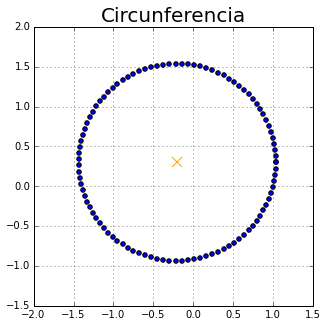

In [5]:
# Número de puntos de la circunferencia que 
# vamos a transformar para obtener el perfil
N_perfil = 100

#se barre un ángulo de 0 a 2 pi
theta = np.linspace(0, 2*np.pi, N_perfil)

#se crean las coordenadas del los puntos
#de la circunferencia
Xc = np.real(t0) + R * np.cos(theta)
Yc = np.imag(t0) + R * np.sin(theta)

#lo visulaizamos
plt.figure("circunferencia", figsize=(5,5))
plt.title('Circunferencia', {'fontsize':20})
plt.scatter(Xc, Yc)
plt.scatter(np.real(t0), np.imag(t0), color='orange', marker='x', s=100)
plt.grid()

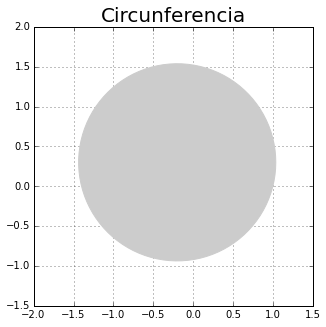

In [6]:
# Lo visulaizamos más bonito
plt.figure("circunferencia", figsize=(5,5))
plt.title('Circunferencia', {'fontsize':20})
# Esto no tienes por qué entenderlo ahora 
p = plt.Polygon(list(zip(Xc, Yc)), color="#cccccc", zorder=3)
plt.gca().add_patch(p)

plt.ylim(-1.5, 2)
plt.xlim(-2, 1.5)
plt.grid()

### Transformación de cirunferencia a perfil

Ahora estamos en condiciones de __transformar estos puntos de la circunferencia (`Xc`, `Yc`) en los del perfil (`Xp`, `Yp`)__. Para esto vamos a usar nuestra función `transf_yukovski`. Recuerda que esta función recibe y da números complejos. ¿Saldrá un perfil?

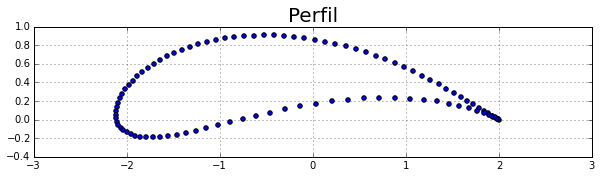

In [7]:
Puntos_perfil = transf_yukovski(a, Xc+Yc*1j)
Xp, Yp = np.real(Puntos_perfil) , np.imag(Puntos_perfil)

#lo visulaizamos
plt.figure("perfil yukovski", figsize=(10,10))
plt.title('Perfil', {'fontsize':20})
plt.scatter(Xp, Yp)
plt.grid()
plt.gca().set_aspect(1)

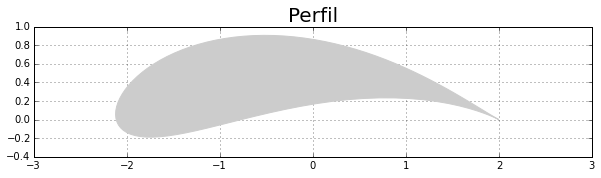

In [8]:
#lo visulaizamos más bonito
plt.figure('perfil yukovski', figsize=(10,10))
plt.title('Perfil', {'fontsize':20})

p = plt.Polygon(list(zip(Xp, Yp)), color="#cccccc", zorder=3)
plt.gca().add_patch(p)
plt.gca().set_aspect(1)

plt.xlim(-3, 3)
plt.ylim(-0.4,1)
plt.grid()


## 4. Flujo alrededor del cilindro

Para visualizar ahora el flujo alrededor del cilindro recurrimos al __potencial complejo__ de una _corriente uniforme_ que forme un ángulo $\alpha$ con el eje $x$ _en presencia de un cilindro_ (aplicando el teorema del círculo) y se añade un torbellino con la intensidad adecuada para que se cumpla la hipótesis de Kutta en el perfil:

\begin{equation}
f(t)=U_{\infty}\text{·}\left((t-t_{0})\text{·}e^{-i\alpha}+\frac{R^{2}}{t-t_{0}}\text{·}e^{i\alpha}\right)+\frac{i\Gamma}{2\pi}\text{·}ln(t-t_{0})=\Phi+i\Psi
\end{equation}

donde $\Phi$ es el potencial de velocidades y $\Psi$ es la función de corriente.

$$\Gamma = 4  \pi  a  U  (\delta + (1+\lambda)  \alpha)$$

$\Gamma$ es la circulación que hay que añadir al cilindro para que al transformarlo en el perfil se cumpla la condición de Kutta.

Recordando que la función de corriente toma un valor constante en las líneas de corriente, sabemos que: dibujando $\Psi=cte$ se puede visualizar el flujo.

__Pintaremos estas lineas de potencial constante utilizando la función `contour()`, pero antes tendremos que crear una malla circular. Esto será lo primero que hagamos:__

_Explicar la malla_



__Recuerda que:__

* Los puntos sobre la circunferencia se transforman en el perfil.
* Los puntos interiores a la circunferencia se transforman en puntos interiores al perfil.
* Los puntos exteriores a la circunferencia se transforman en puntos exteriores al perfil. __Los puntos que nos interesan__.

In [52]:
#se crea la malla donde se va pintar la función de corriente

# Dirección radial
N_R = 50   # Número de puntos en la dirección radial
R_min = R
R_max = 10

# Dirección tangencial
N_T = 180   # Número de puntos en la dirección tangencial

R_ = np.linspace(R_min, R_max, N_R)

T_ = np.linspace(0, 2*np.pi , N_T)

# El menos en la XX  es para que el borde de ataque del perfil esté en la izquierda
XX = - (R_ * np.cos(T_).reshape((-1, 1)) - np.real(t0))
YY = R_ * np.sin(T_).reshape((-1, 1)) + np.imag(t0)

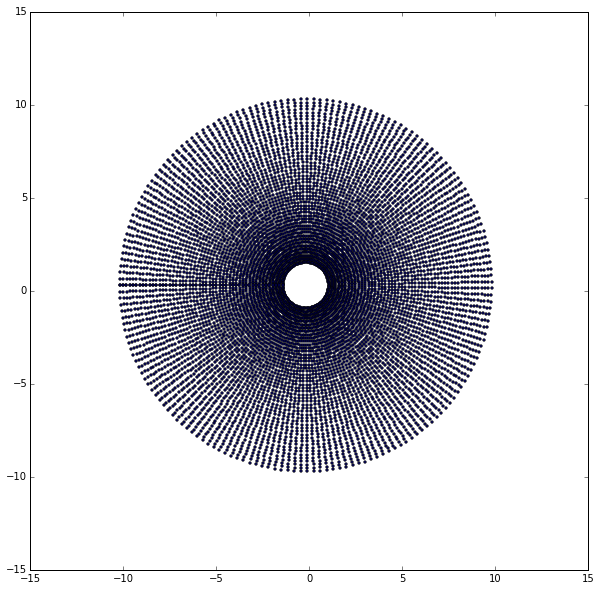

In [31]:
#pintamos la malla para verla
plt.figure(figsize=(10,10))
plt.scatter(XX.flatten(), YY.flatten(), marker='.')

__NOTA__: En versiones anteriores se utilizaba una malla rectangular. Esto generaba algunos problemas con los puntos interiores a la hora de pintar las líneas de corriente y los campos de velocidades y presiones. La idea de usar una malla circular está tomada de [este ejercicio](http://nbviewer.ipython.org/github/barbagroup/AeroPython/blob/master/lessons/06_Lesson06_Assignment.ipynb) del curso Aerodynamics-Hydrodynamics with Python de la [Prof. Lorena Barba](http://lorenabarba.com/).

### Probando a transformar la malla

Bueno, lo que queríamos era hacer cosas alrededor de nuestro perfil, ¿no?

Esto lo conseguiremos pintando la función $\Psi$ en los puntos `XX_tau, YY_tau` transformados de los `XX, YY` a través de la función `transf_yukovski`, recuerda que la transformación que tenemos recibe y da números complejos. Como antes, debes separar parte real e imaginaria. En la siguiente celda transforma tt (donde debería estar almacenada la malla en forma compleja) para obtener `XX_tau, YY_tau`.

Probemos a visualizar como se transforman los puntos de la malla primero.

In [32]:
tt = XX + YY * 1j
tautau = transf_yukovski(a, tt)
XX_tau, YY_tau = np.real(tautau) , np.imag(tautau)

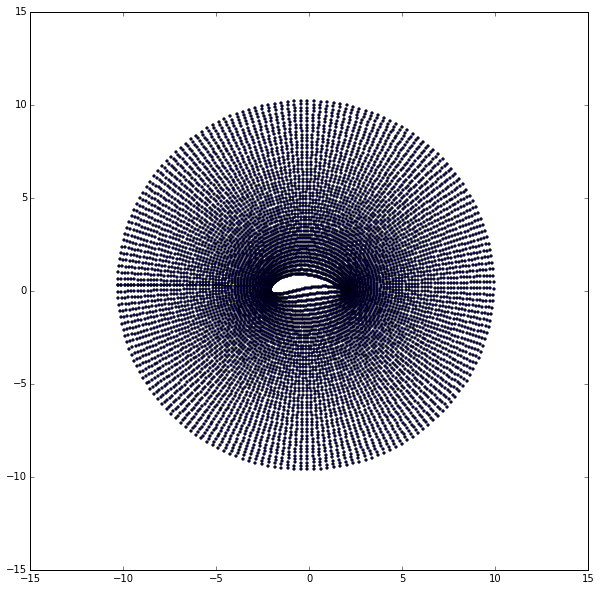

In [33]:
# Comprobamos que los puntos exteriores a la circunferencia se transforman en los puntos exteriores del perfil
#pintamos la malla para verla
plt.figure(figsize=(10,10))
plt.scatter(XX_tau.flatten(), YY_tau.flatten(), marker='.')

1. Crea una variable `T` que tenga el valor correspondiente a la circulación $\Gamma$.
2. Utilizando `XX` e `YY`, crea un array `tt` que exprese la malla de forma compleja.
3. Utilizando el array `t`, el valor `T` y los parámetros definidos al principio (`t0, alfa, U...`) crea `f` según la fórmula de arriba (no hace falta que crees una función).
4. Guarda la parte imaginaria de esa función (función de corriente) en una variable `psi`.

In [34]:
# Circulación que hay que añadir al cilindro para
# que se cumpla la hipótesis de Kutta en el perfil
T = 4 * np.pi * a * U * (delta + (1+landa) * alfa)

# Malla compleja
tt = XX + YY * 1j

# Potencial complejo
f = U * ( (tt - t0) * np.exp(-alfa *1j) + R**2 / (tt - t0) * np.exp(alfa * 1j) )
f += 1j * T / (2* np.pi) * np.log(tt - t0)
    
# Función de corriente
psi = np.imag(f)

Como la función de corriente toma un valor constante en cada línea de corriente, podemos visualizar el flujo alrededor del cilindro pintando las lineas en las que `psi` toma un valor constante. Para ello utilizaremos la función `contour()` en la malla `XX, YY`. Si no se ve nada prueba a cambiar el número de líneas y los valores máximo y mínimo de la función que se representan.

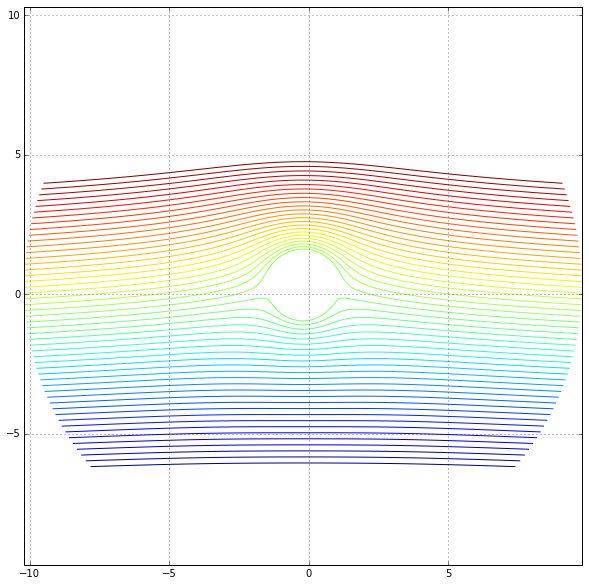

In [35]:
#lo visulaizamos
plt.figure('lineas de corriente', figsize=(10,10))

plt.contour(XX, YY, psi, np.linspace(-5,5,50))
plt.grid()
plt.gca().set_aspect(1)
#plt.xlim(-8, 8)
#plt.ylim(-3, 3)

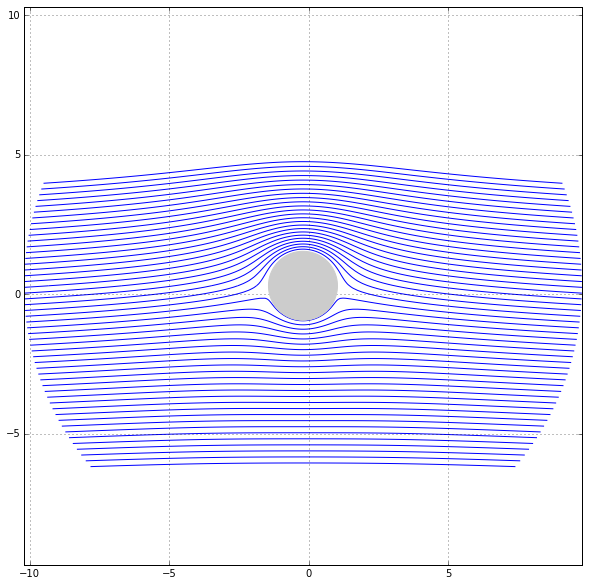

In [36]:
#ponemos el cilindro encima
plt.figure('flujo cilindro', figsize=(10,10))

plt.contour(XX, YY, psi, np.linspace(-5,5,50), colors=['blue', 'blue'])
plt.grid()
plt.gca().set_aspect(1)

p = plt.Polygon(list(zip(Xc, Yc)), color="#cccccc", zorder=3)
plt.gca().add_patch(p)

## 5. Flujo alrededor del perfil

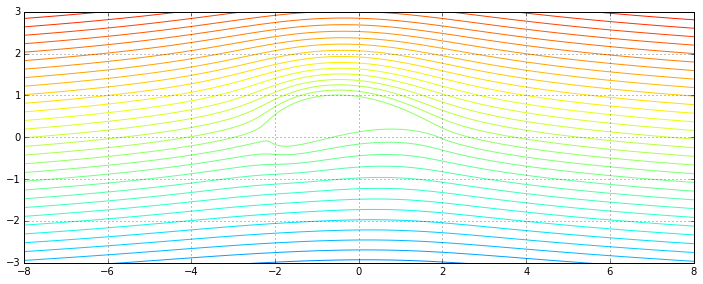

In [37]:
plt.figure("flujo perfil", figsize=(12,12))

plt.contour(XX_tau, YY_tau, psi, np.linspace(-5,5,50))

plt.xlim(-8,8)
plt.ylim(-3,3)
plt.grid()
plt.gca().set_aspect(1)

### Obteniendo el flujo

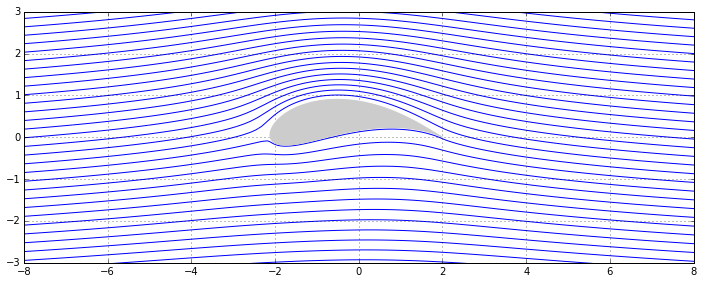

In [38]:
#Ahora ponemos el perfil encima
plt.figure("flujo perfil", figsize=(12,12))

plt.contour(XX_tau, YY_tau, psi, np.linspace(-5, 5, 50), colors=['blue', 'blue'])

p = plt.Polygon(list(zip(Xp, Yp)), color="#cccccc", zorder=10)
plt.gca().add_patch(p)

plt.xlim(-8,8)
plt.ylim(-3,3)
plt.grid()
plt.gca().set_aspect(1)

## 6. Interact

__Ahora es un buen momento para jugar con todos los parámetros del problema. 
~~¡Prueba a cambiarlos y ejecuta el notebook entero!~~__ 

__Vamos a usar un `interact`, ¿no?__

Tenemos que crear una función que haga todas las tareas: reciba los argumentos y pinte para llamar a interact con ella. No tenemos más que cortar y pegar.

In [39]:
def transformacion_geometrica(a, landa, delta, N_perfil=100):
    #punto del plano complejo
    t0 = a * (-landa + delta * 1j)
    #valor del radio de la circunferencia
    R = a * np.sqrt((1 + landa)**2 + delta**2)
    #se barre un ángulo de 0 a 2 pi
    theta = np.linspace(0, 2*np.pi, N_perfil)
    #se crean las coordenadas del los puntos
    #de la circunferencia
    Xc = - a * landa + R * np.cos(theta)
    Yc =   a * delta + R * np.sin(theta)
    #se crean las coordenadas del los puntos
    #del perfil
    Puntos_perfil = transf_yukovski(a, Xc+Yc*1j)
    Xp, Yp = np.real(Puntos_perfil) , np.imag(Puntos_perfil)
    
    #Se pintan la cirunferencia y el perfil
    fig, ax = plt.subplots(1,2)
    fig.set_size_inches(15,15)
    p_c = plt.Polygon(list(zip(Xc, Yc)), color="#cccccc", zorder=1)
    ax[0].add_patch(p_c)
    ax[0].plot(Xc,Yc)
    ax[0].set_aspect(1)
    ax[0].set_xlim(-3, 3)
    ax[0].set_ylim(-2,2)
    ax[0].grid()
    
    p_p = plt.Polygon(list(zip(Xp, Yp)), color="#cccccc", zorder=1)
    ax[1].add_patch(p_p)
    ax[1].plot(Xp,Yp)
    ax[1].set_aspect(1)

    ax[1].set_xlim(-3, 3)
    ax[1].set_ylim(-2,2)
    ax[1].grid()

In [40]:
from IPython.html.widgets import interact

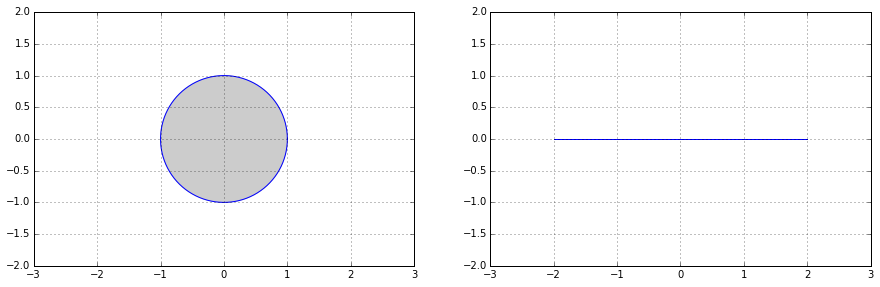

In [41]:
w = interact(transformacion_geometrica, landa=(-1.,1), delta=(-1.,1), a=(0,2.), N_perfil=(4, 200) )

In [53]:
def flujo_perfil_circunferencia(landa, delta, alfa, U=1,  N_malla = 100):
    N_perfil=100
    a=1
    #punto del plano complejo
    t0 = a * (-landa + delta * 1j)
    #valor del radio de la circunferencia
    R = a * np.sqrt((1 + landa)**2 + delta**2)

    #se barre un ángulo de 0 a 2 pi
    theta = np.linspace(0, 2*np.pi, N_perfil)
    #se crean las coordenadas del los puntos
    #de la circunferencia
    Xc = - a * landa + R * np.cos(theta)
    Yc =   a * delta + R * np.sin(theta)
    
    #se crean las coordenadas del los puntos
    #del perfil
    Puntos_perfil = transf_yukovski(a, Xc+Yc*1j)
    Xp, Yp = np.real(Puntos_perfil) , np.imag(Puntos_perfil)
    
    #se crea la malla donde se va pintar la función de corriente

    # Dirección radial
    N_R = 50   # Número de puntos en la dirección radial
    R_min = R
    R_max = 10

    # Dirección tangencial
    N_T = 180   # Número de puntos en la dirección tangencial

    R_ = np.linspace(R_min, R_max, N_R)
    T_ = np.linspace(0, 2*np.pi , N_T)

    # El menos en la XX  es para que el borde de ataque del perfil esté en la izquierda
    XX = - (R_ * np.cos(T_).reshape((-1, 1)) - np.real(t0))
    YY = R_ * np.sin(T_).reshape((-1, 1)) + np.imag(t0)
    
    tt = XX + YY * 1j
    
    alfa = np.deg2rad(alfa)
    # Circulación que hay que añadir al cilindro para
    # que se cumpla la hipótesis de Kutta en el perfil
    T = 4 * np.pi * a * U * (delta + (1+landa) * alfa)
    #Potencial complejo
    f = U * ( (tt - t0) * np.exp(-alfa *1j) + R**2 / (tt - t0) * np.exp(alfa * 1j) )
    f += 1j * T / (2* np.pi) * np.log(tt - t0)
    #Función de corriente
    psi = np.imag(f)   

    Puntos_plano_tau = transf_yukovski(a, tt)
    XX_tau, YY_tau = np.real(Puntos_plano_tau) , np.imag(Puntos_plano_tau)
                
    #Se pinta
    fig, ax = plt.subplots(1,2)
    #lineas de corriente
    fig.set_size_inches(15,15)
    
    ax[0].contour(XX, YY, psi, np.linspace(-10,10,50), colors = ['blue', 'blue'])
    ax[0].grid()
    ax[0].set_aspect(1)
    p = plt.Polygon(list(zip(Xc, Yc)), color="#cccccc", zorder=10)
    ax[0].add_patch(p)
    ax[0].set_xlim(-5, 5)
    ax[0].set_ylim(-2,2)
    
    ax[1].contour(XX_tau, YY_tau, psi, np.linspace(-10,10,50), colors = ['blue', 'blue'])
    ax[1].grid()
    ax[1].set_aspect(1)
    p = plt.Polygon(list(zip(Xp, Yp)), color="#cccccc", zorder=10)
    ax[1].add_patch(p)
    ax[1].set_xlim(-5, 5)
    ax[1].set_ylim(-2,2)

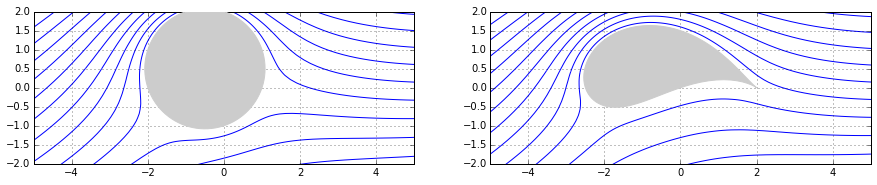

In [51]:
p = interact(flujo_perfil_circunferencia, landa=(0.,1), delta=(0.,1), alfa=(0, 30), U=(0,10))

In [44]:
#Velocidad conjugada
dfdt = U * ( 1 * np.exp(-alfa * 1j) - R**2 / (tt - t0)**2 * np.exp(alfa * 1j) )
dfdt += 1j * T / (2*np.pi) * 1 / (tt - t0)
#coeficiente de presion
cp = 1 - np.abs(dfdt)**2 / U**2

In [45]:
cmap = plt.cm.RdBu

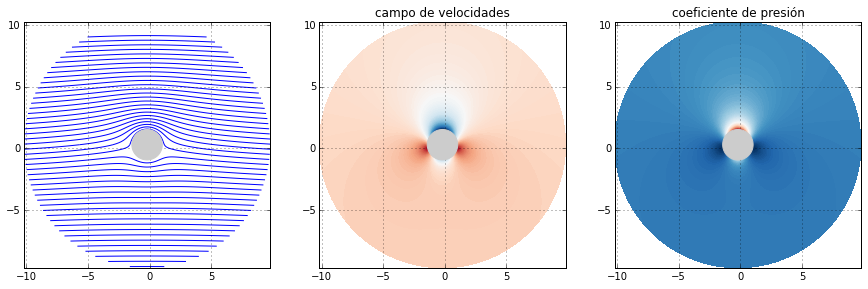

In [46]:
#Se pinta
fig, ax = plt.subplots(1,3)
#lineas de corriente
fig.set_size_inches(15,15)
ax[0].contour(XX, YY, psi, np.linspace(-10,10,50), colors = ['blue', 'blue'])
ax[0].grid()
ax[0].set_aspect(1)
p = plt.Polygon(list(zip(Xc, Yc)), color="#cccccc", zorder=10)
ax[0].add_patch(p)
#Campo de velocidades
ax[1].contourf(XX, YY, np.abs(dfdt), 200, cmap=cmap)
p = plt.Polygon(list(zip(Xc, Yc)), color="#cccccc", zorder=10)
ax[1].set_title('campo de velocidades')
ax[1].add_patch(p)
ax[1].set_aspect(1)
ax[1].grid()
#campo de presiones
ax[2].contourf(XX, YY, cp, 200, cmap=cmap)
p = plt.Polygon(list(zip(Xc, Yc)), color="#cccccc", zorder=10)
ax[2].set_title('coeficiente de presión')
ax[2].add_patch(p)
ax[2].set_aspect(1)
ax[2].grid()

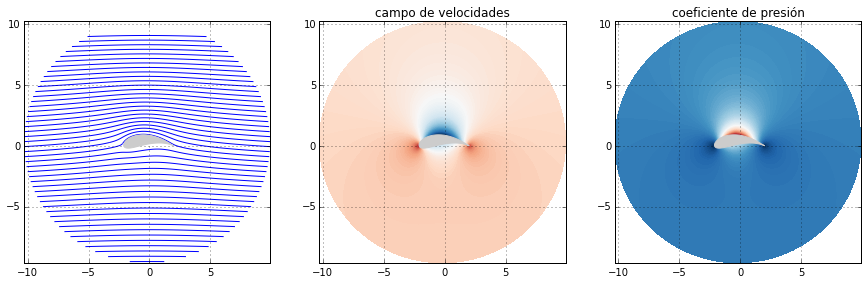

In [47]:
#Se pinta
fig, ax = plt.subplots(1,3)
#lineas de corriente
fig.set_size_inches(15,15)
ax[0].contour(XX_tau, YY_tau, psi, np.linspace(-10,10,50), colors = ['blue', 'blue'])
ax[0].grid()
ax[0].set_aspect(1)
p = plt.Polygon(list(zip(Xp, Yp)), color="#cccccc", zorder=10)
ax[0].add_patch(p)
#Campo de velocidades
ax[1].contourf(XX_tau, YY_tau, np.abs(dfdt), 200, cmap=cmap)
p = plt.Polygon(list(zip(Xp, Yp)), color="#cccccc", zorder=10)
ax[1].set_title('campo de velocidades')
ax[1].add_patch(p)
ax[1].set_aspect(1)
ax[1].grid()
#campo de presiones
ax[2].contourf(XX_tau, YY_tau, cp, 200, cmap=cmap)
p = plt.Polygon(list(zip(Xp, Yp)), color="#cccccc", zorder=10)
ax[2].set_title('coeficiente de presión')
ax[2].add_patch(p)
ax[2].set_aspect(1)
ax[2].grid()

In [48]:
def cp_perfil_circunferencia(landa, delta, alfa, U=1,  N_malla = 100):
    N_perfil=100
    a=1
    #punto del plano complejo
    t0 = a * (-landa + delta * 1j)
    #valor del radio de la circunferencia
    R = a * np.sqrt((1 + landa)**2 + delta**2)

    #se barre un ángulo de 0 a 2 pi
    theta = np.linspace(0, 2*np.pi, N_perfil)
    #se crean las coordenadas del los puntos
    #de la circunferencia
    Xc = - a * landa + R * np.cos(theta)
    Yc =   a * delta + R * np.sin(theta)
    
    #se crean las coordenadas del los puntos
    #del perfil
    Puntos_perfil = transf_yukovski(a, Xc+Yc*1j)
    Xp, Yp = np.real(Puntos_perfil) , np.imag(Puntos_perfil)
    
    #se crea la malla donde se va pintar la función de corriente

    # Dirección radial
    N_R = 50   # Número de puntos en la dirección radial
    R_min = R
    R_max = 10

    # Dirección tangencial
    N_T = 180   # Número de puntos en la dirección tangencial

    R_ = np.linspace(R_min, R_max, N_R)
    T_ = np.linspace(0, 2*np.pi, N_T)

    # El menos en la XX  es para que el borde de ataque del perfil esté en la izquierda
    XX = - (R_ * np.cos(T_).reshape((-1, 1)) - np.real(t0))
    YY = R_ * np.sin(T_).reshape((-1, 1)) + np.imag(t0)
    
    tt = XX + YY * 1j
    
    alfa = np.deg2rad(alfa)
    # Circulación que hay que añadir al cilindro para
    # que se cumpla la hipótesis de Kutta en el perfil
    T = 4 * np.pi * a * U * (delta + (1+landa) * alfa)
    
    #Velocidad conjugada
    dfdt = U * ( 1 * np.exp(-alfa * 1j) - R**2 / (tt - t0)**2 * np.exp(alfa * 1j) )
    dfdt = dfdt + 1j * T / (2*np.pi) * 1 / (tt - t0)
    #coeficiente de presion
    cp = 1 - np.abs(dfdt)**2 / U**2

    Puntos_plano_tau = transf_yukovski(a, tt)
    XX_tau, YY_tau = np.real(Puntos_plano_tau) , np.imag(Puntos_plano_tau)
                
    #Se pinta
    fig, ax = plt.subplots(1,2)
    
    #coeficiente de presión
    fig.set_size_inches(15,15)
    
    ax[0].contourf(XX, YY, cp, 200, cmap=cmap)
    ax[0].grid()
    ax[0].set_aspect(1)
    p = plt.Polygon(list(zip(Xc, Yc)), color="#cccccc", zorder=10)
    ax[0].add_patch(p)
    ax[0].set_xlim(-5, 5)
    ax[0].set_ylim(-3,3)
    
    ax[1].contourf(XX_tau, YY_tau, cp, 200, cmap=cmap)
    ax[1].grid()
    ax[1].set_aspect(1)
    p = plt.Polygon(list(zip(Xp, Yp)), color="#cccccc", zorder=10)
    ax[1].add_patch(p)
    ax[1].set_xlim(-5, 5)
    ax[1].set_ylim(-3,3)

<function __main__.cp_perfil_circunferencia>

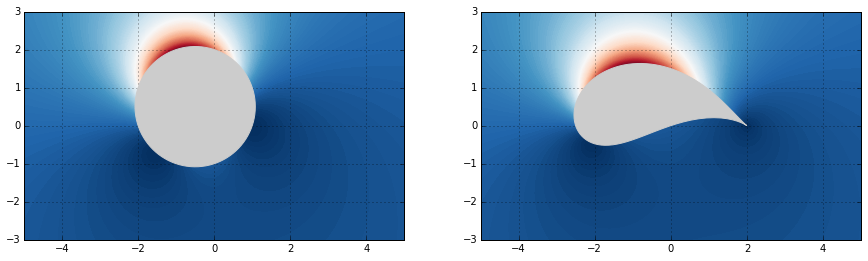

In [49]:
interact(cp_perfil_circunferencia, landa=(0.,1), delta=(0.,1), alfa=(0, 30), U=(0,10))

---

_En esta clase hemos reafirmado nuestros conocimientos de NumPy, matplotlib y Python, general (funciones, bucles, condicionales...) aplicándolos a un ejemplo muy aeronáutico_

Si te ha gustado esta clase:

<a href="https://twitter.com/share" class="twitter-share-button" data-url="https://github.com/AeroPython/Curso_AeroPython" data-text="Aprendiendo Python con" data-via="pybonacci" data-size="large" data-hashtags="AeroPython">Tweet</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

---

#### <h4 align="right">¡Síguenos en Twitter!

###### <a href="https://twitter.com/Pybonacci" class="twitter-follow-button" data-show-count="false">Follow @Pybonacci</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>  <a href="https://twitter.com/Alex__S12" class="twitter-follow-button" data-show-count="false" align="right";>Follow @Alex__S12</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>  <a href="https://twitter.com/newlawrence" class="twitter-follow-button" data-show-count="false" align="right";>Follow @newlawrence</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

<a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [ ]:
%%html
<a href="https://twitter.com/Pybonacci" class="twitter-follow-button" data-show-count="false">Follow @Pybonacci</a>
<script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script>

In [ ]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../static/styles/style.css'
HTML(open(css_file, "r").read())